# Handle Imbalanced Data

What is imbalanced data?
> Imbalanced data reflects an unequal distribution of classes within a dataset.

issue with imbalanced data
> Basically due to imbalanced data system can't able accurately predicting for both majority and minority class.

How to resolve imbalanced dataset
1. Choose Proper Evaluation Metric
2. Resampling
3. SMOTE
4. SMOTETomek
5. BalancedBaggingClassifier
6. Threshold moving



## 1. Choose Proper Evaluation Metric

* All knows accuracy of a classifier is the total number of correct predictions by the classifier divided by the total number of predictions.

* This is for well-balanced class but for inbalance dataset this not work.

* for a inbalance dataset F1 score is appropriate matric.

What is f1 score?
* F1 score is harmonic mean of the precision and recall.
> Here f1 score will reaches its best value at 1 and worst score at 0.

Formula:

>F1 = 2 (precision * recall) / (precision + recall)

> Precision: TP/(TP + FP)

> Recall: TP/(TP + FN)

In [3]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [89]:
#load dataset
dataset = pd.read_csv('creditcard.csv',sep=',')
dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [90]:
#show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [101]:
#select colomn 
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
#applyed train,test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
LR = LogisticRegression()
LR.fit(X_train, y_train)

In [103]:
LR_pre = LR.predict(X_test)
np.mean(pred_LR == y_test)*100

99.69219245578924

In [105]:
#create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, LR_pre)

array([[85247,    44],
       [   46,   106]])

In [106]:
#show classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.71      0.70      0.70       152

    accuracy                           1.00     85443
   macro avg       0.85      0.85      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [107]:
#find F1 score 
from sklearn.metrics import f1_score
f1_score(y_test,LR_pre)*100

70.19867549668875

## 2. Resampling
When we are using an imbalanced dataset at that time Resampling is used to upsample or downsample the minority or majority class.

 
* Undersampling:
> we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.

* Oversampling:
>  we can oversample the minority class using replacement. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


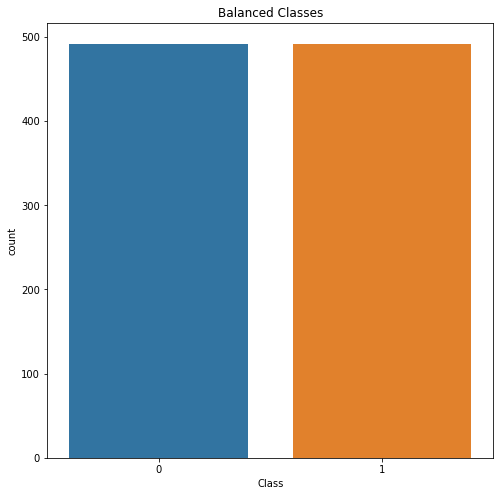

In [113]:
import seaborn as sns
# Shuffle the Dataset.
shuffled_df = dataset.sample(frac=1,random_state=4)

# amount of fraud classes 492 rows.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

#Randomly select 492 observations.
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)
normalized_df = pd.concat([fraud_df, non_fraud_df])
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

## 3. Oversampling(SMOTE)
* SMOTE is technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_resample(dataset.drop('Class', axis=1), dataset['Class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=oversampled_train)
plt.title('Balanced Classes')
plt.show()

## 4.Oversampling(SMOTETomek)
SMOTETomek is a hybrid method
which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from collections import Counter
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)
X_res.shape,y_res.shape
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})
